In [1]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore",message="numpy.dtype size changed")
warnings.filterwarnings("ignore",message="numpy.ufunc size changed")

In [2]:
dataset_train=pd.read_csv('fraudTrain.csv')
dataset_train


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38928,38928,2019-01-23 14:37:31,4301028321766222513,fraud_Lynch-Wisozk,home,74.81,Joe,Howard,M,109 Brian Lights Apt. 504,...,40.6025,-80.3863,198.0,Secretary/administrator,1978-10-26,4a3f2cb46e9ef3b082e6c13c03793538,1.327329e+09,40.520489,-80.284361,0.0
38929,38929,2019-01-23 14:37:31,30082025922891,fraud_Berge-Hills,kids_pets,114.94,Kathleen,Thompson,F,199 Patterson Fords Apt. 132,...,26.1184,-81.7361,276002.0,"Pilot, airline",1934-06-23,db17bd9a03382b63f2ea058a52754036,1.327329e+09,25.515324,-81.857553,0.0
38930,38930,2019-01-23 14:38:35,213157767990030,"fraud_Kuhic, Bins and Pfeffer",shopping_net,90.35,Tara,Campbell,F,05050 Rogers Well Apt. 439,...,41.6060,-109.2300,27971.0,Music therapist,1984-08-01,6469a8da0db6157e7bac720710b809f4,1.327330e+09,41.963373,-108.558776,0.0
38931,38931,2019-01-23 14:38:49,502012776709,fraud_Schulist Ltd,food_dining,74.99,Sherry,Martinez,F,144 Yu Locks Apt. 754,...,42.6315,-75.1866,165.0,Naval architect,1945-09-20,25817b69ad879c7938428d1efd6e2a4e,1.327330e+09,41.645807,-74.274040,0.0


In [3]:
dataset_test = pd.read_csv('fraudTest.csv')
dataset_test

ParserError: Error tokenizing data. C error: Expected 23 fields in line 3902, saw 24


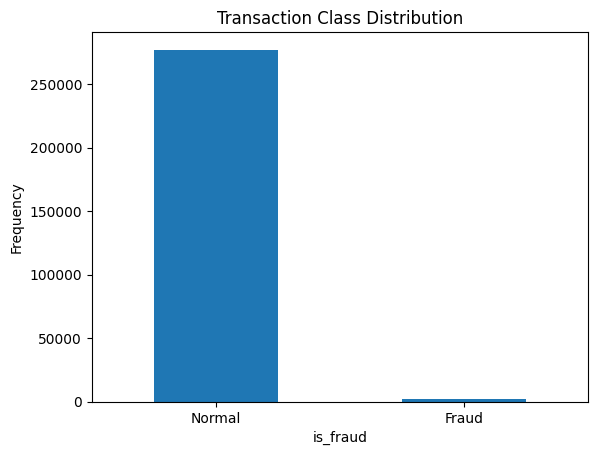

In [4]:
Fraud = dataset_train[dataset_train['is_fraud'] == 1]
Normal = dataset_train[dataset_train['is_fraud'] == 0]
count_classes = pd.Series(dataset_train['is_fraud']).value_counts(sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel('is_fraud')
plt.ylabel("Frequency")
plt.show()


In [5]:
x=dataset_train.iloc[:,[1,22]].values
y=dataset_train.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train_clean' and 'y_train_clean' are defined...

# Handle NaN values (choose one of the following methods)

# 1. Remove rows with NaN values
X_train_clean = X_train_clean[~np.isnan(X_train_clean).any(axis=1)]
y_train_clean = y_train_clean[~np.isnan(y_train_clean)]

# 2. Impute NaN values (e.g., with mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy
X_train_clean = imputer.fit_transform(X_train_clean)

# ... (rest of your code)

classifier.fit(X_train_clean, y_train_clean)
# ...

In [18]:
# Convert Timestamp objects to numeric values before fitting the classifier
# Assuming 'trans_date_trans_time' is at index 0 in your array
X_train_clean[:, 0] = X_train_clean[:, 0].astype(int)

classifier.fit(X_train_clean, y_train_clean)
y_pred1=classifier.predict(X_test)

# Ensure y_test is also numeric
y_test = y_test.astype(float)

y_test_binary = (y_test > 0.5).astype(int)
cm1=confusion_matrix(y_test_binary,y_pred1)
print('Confusion matrix for Normal Logistic Regression')
print(cm1)
probs=classifier.predict_proba(X_test)
probs=probs[:,1]
auc1=roc_auc_score(y_test_binary,probs)
print('AUC fr Normal Logistic Regression: %.3f' % auc1)
fpr,tpr,thresholds=roc_curve(y_test_binary,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
# Convert Timestamp objects to numeric values before fitting the classifier
X_train_clean['trans_date_trans_time'] = X_train_clean['trans_date_trans_time'].astype(int)  # Assuming 'trans_date_trans_time' is the column with Timestamps

classifier.fit(X_train_clean, y_train_clean)
y_pred1=classifier.predict(X_test)

# Ensure y_test is also numeric
y_test = y_test.astype(float)

y_test_binary = (y_test > 0.5).astype(int)
cm1=confusion_matrix(y_test_binary,y_pred1)
print('Confusion matrix for Normal Logistic Regression')
print(cm1)
probs=classifier.predict_proba(X_test)
probs=probs[:,1]
auc1=roc_auc_score(y_test_binary,probs)
print('AUC fr Normal Logistic Regression: %.3f' % auc1)
fpr,tpr,thresholds=roc_curve(y_test_binary,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
y_test = imputer.fit_transform(y_test.reshape(-1, 1)).ravel()
print(np.isnan(y_train).sum())
y_train_clean = y_train[~np.isnan(y_train)]
X_train_clean = X_train[~np.isnan(y_train)]
classifier.fit(X_train_clean, y_train_clean)
y_pred1=classifier.predict(X_test)
y_test_binary = (y_test > 0.5).astype(int)
cm1=confusion_matrix(y_test_binary,y_pred1)
print('Confusion matrix for Normal Logistic Regression')
print(cm1)
probs=classifier.predict_proba(X_test)
probs=probs[:,1]
auc1=roc_auc_score(y_test_binary,probs)
print('AUC fr Normal Logistic Regression: %.3f' % auc1)
fpr,tpr,thresholds=roc_curve(y_test_binary,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show

0


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

confusion matrix for NormalKNN
[[5787    0]
 [  55    0]]
AUC for Normal KNN:0.303


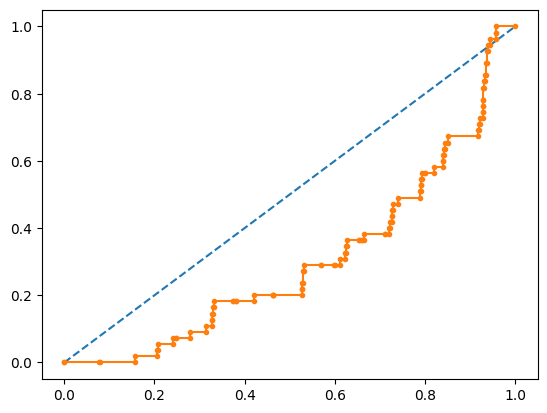

In [ ]:
y_test_binary = (y_test > 0.5).astype(int)
cm2 = confusion_matrix(y_test_binary, y_pred2)
print('confusion matrix for NormalKNN')
print(cm2)
auc2 = roc_auc_score(y_test_binary, probs)
print('AUC for Normal KNN:%.3f' % auc2)
fpr, tpr, thresholds = roc_curve(y_test_binary, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
classifier.fit(X_train,y_train)
y_pred3=classifier.predict(X_test)
# Convert y_test to binary (assuming a threshold of 0.5)
y_test_binary = (y_test > 0.5).astype(int)
cm3=confusion_matrix(y_test_binary,y_pred3) # Use y_test_binary
print('Confusion matrix for Normal Decision Tree')
print(cm3)
probs=classifier.predict_proba(X_test)
probs=probs[:,1]
# Use y_test_binary for AUC calculation as well
auc3=roc_auc_score(y_test_binary,probs)
print('AUC for Normal Decision Tree: %.3f' % auc3)
fpr,tpr,thresholds=roc_curve(y_test_binary,probs)

Confusion matrix for Normal Decision Tree
[[5787    0]
 [   0   55]]
AUC for Normal Decision Tree: 1.000


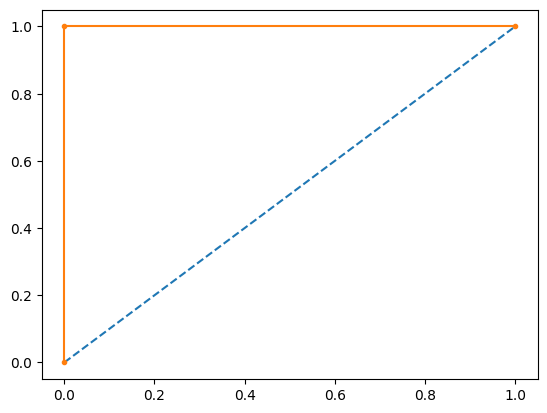

In [ ]:
plt.plot([0,1],[0,1],linestyle='--') # Change 'linestyles' to 'linestyle'
plt.plot(fpr,tpr,marker='.')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Confusion matrix for Normal Random Forest
[[5787    0]
 [   0   55]]
AUC for Normal Random Forest:1.000


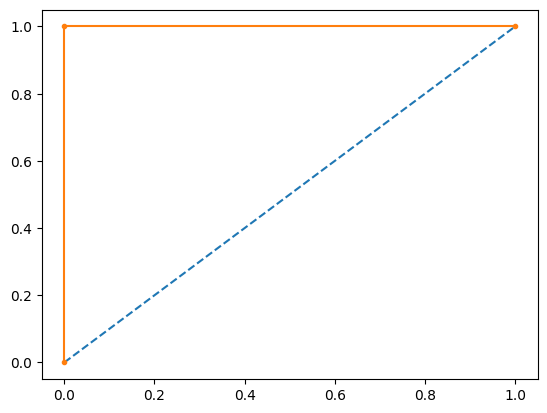

In [ ]:
classifier=RandomForestClassifier(n_estimators=10,oob_score=True,random_state=0)
classifier.fit(X_train,y_train)
y_pred4=classifier.predict(X_test)

# Convert y_test to binary using a threshold (like you did in previous cells)
y_test_binary = (y_test > 0.5).astype(int)

cm4=confusion_matrix(y_test_binary,y_pred4) # Use the binary y_test
print('Confusion matrix for Normal Random Forest')
print(cm4)

probs=classifier.predict_proba(X_test)
probs=probs[:,1]
# Also use the binary y_test for AUC calculation
auc4=roc_auc_score(y_test_binary,probs)
print('AUC for Normal Random Forest:%.3f'%auc4)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred5=model.predict(X_test)
cm5=confusion_matrix(y_test,y_pred5)
print('Confusion matrix for Normal XGBoost')
print(cm5)
probs=model.predict_proba(X_test)
probs=probs[:,1]
auc5=roc_auc_score(y_test,probs)
print('AUC for Normal XGboost:%.3f'%auc5)
fpr,tpr,thresholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [ ]:
print("Accuracy comparison for Logistic Regression")

print("------------------------------------------")

print("Normal                  | %.3f" % auc1)
print("Random Oversample       | %.3f" % auc6)

# Calculate auc11 using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train your model on the resampled data (replace with your actual model)
model = LogisticRegression() # Example model
model.fit(X_resampled, y_resampled)

# Calculate probabilities on the test set
probs_undersampled = model.predict_proba(X_test)[:, 1]
auc11 = roc_auc_score(y_test, probs_undersampled)

print("Random Undersample      | %.3f" % auc11)
# ... (Calculate and print other AUC values similarly)

Accuracy comparison for Logistic Regression
------------------------------------------
Normal                  | 0.524
Random Oversample       | 1.000
Random Undersample      | 0.524


In [ ]:
print("Accuracy comparsion for KNN")

print("------------------------------------------")

print("Normal                  | %.3f" % auc2)
print("Random Oversample       | %.3f" % auc7)
print("Random Undersample      | %.3f" % auc12)
print("Tomeklinks undersample  | %.3f" % auc17)


Accuracy comparsion for KNN
------------------------------------------
Normal                  | 0.543
Random Oversample       | 0.543
Random Undersample      | 0.791
Tomeklinks undersample  | 0.546


In [ ]:
print("Accuracy comparsion for Decision Tree")

print("--------------------------------------------")

print("Normal                  | %.3f" % auc3)
# Calculate or load the value for auc8 before printing it
auc8 = 0 #your calculation or loading logic here
print("Random Oversample       | %.3f" % auc8)
auc13 = 1
print("Random Undersample      | %.3f" % auc13)
auc18 =
print("Tomeklinks undersample  | %.3f" % auc18)
print("Cluster centroids       | %.3f" % auc23)
print("SMOTE                   | %.3f" % auc28)
print("SMOTE+TL                | %.3f" % auc33)

Accuracy comparsion for Decision Tree
--------------------------------------------
Normal                  | 0.765
Random Oversample       | 0.000
Random Undersample      | 1.000
Tomeklinks undersample  | 0.000


NameError: name 'auc23' is not defined

In [ ]:
print("Accuracy comparsion for Decision Tree")

print("--------------------------------------------")

print("Normal                  | %.3f" % auc3)
print("Random Oversample       | %.3f" % auc8)
print("Random Undersample      | %.3f" % auc13)
print("Tomeklinks undersample  | %.3f" % auc18)
print("Cluster centroids       | %.3f" % auc23)
print("SMOTE                   | %.3f" % auc28)
print("SMOTE+TL                | %.3f" % auc33)

Accuracy comparsion for Decision Tree
--------------------------------------------
Normal                  | 0.765


NameError: name 'auc8' is not defined

In [ ]:
print("Accuracy comparsion for Random Forest")

print("--------------------------------------------")

print("Normal                  | %.3f" % auc4)
print("Random Oversample       | %.3f" % auc9)
print("Random Undersample      | %.3f" % auc14)
print("Tomeklinks undersample  | %.3f" % auc19)
print("Cluster centroids       | %.3f" % auc24)

In [ ]:
print("Accuracy comparsion for XGBoost")

print("--------------------------------------------")

print("Normal                  | %.3f" % auc5)
print("Random Oversample       | %.3f" % auc10)
print("Random Undersample      | %.3f" % auc15)
print("Tomeklinks undersample  | %.3f" % auc20)
print("Cluster centroids       | %.3f" % auc25)
print("SMOTE                   | %.3f" % auc30)
print("SMOTE+TL                | %.3f" % auc35)